In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.cluster import KMeans


# ignoring warnings
import warnings
warnings.filterwarnings("ignore")

In [27]:
col_names = ["SepalLengthCm",  "SepalWidthCm", "PetalLengthCm","PetalWidthCm", "Classes"]
iris = pd.read_csv('iris.data', names = col_names)

iris.sample(5)

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm          Classes
73             6.1           2.8            4.7           1.2  Iris-versicolor
18             5.7           3.8            1.7           0.3      Iris-setosa
118            7.7           2.6            6.9           2.3   Iris-virginica
78             6.0           2.9            4.5           1.5  Iris-versicolor
76             6.8           2.8            4.8           1.4  Iris-versicolor

In [28]:
# split data into features (X) and labels (y)
X = iris.iloc[:,0:4]
y = iris.iloc[:,-1]
data = iris.iloc[:,:-1].values

In [29]:
clusters=len(np.unique(y))

## Now we shall use the elbow technique for finding the number of clusters

In [30]:
def euclidean_dis(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

In [31]:
class KMean:
    
    def __init__(self,data,k,max_ite):
        self.data=data
        self.k=k
        self.max_ite=max_ite
        
    def predict(self):

        centroids = defaultdict(int)
        
        K=self.k
        max_iter=self.max_ite
        
        for i in range(K):
            centroids[i] = self.data[i]



        r=0


        for i in range(max_iter):
            r=r+1
            classes=defaultdict(list)
            
            for key in range(K):
                classes[key]=[]
            for datapoint in self.data:
                distance=[]
                for j in range(K):

                    dis=euclidean_dis(datapoint,centroids[j])

                    distance.append(dis)
                mindis=min(distance)

                index=distance.index(mindis)
                classes[index].append(datapoint)
                old_centroid=dict(centroids)

            for t in range(K):
                class_=classes[t]


                new_centroid=np.mean(class_,axis=0)
                centroids[t]=new_centroid
            flg=1
            for t in range(K):

                a=centroids[t]
                b=old_centroid[t]
                if np.sum((a - b)/b * 100) > 0.001:
                    flg = 0



            if flg==1:
                break


        return classes,centroids

In [32]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

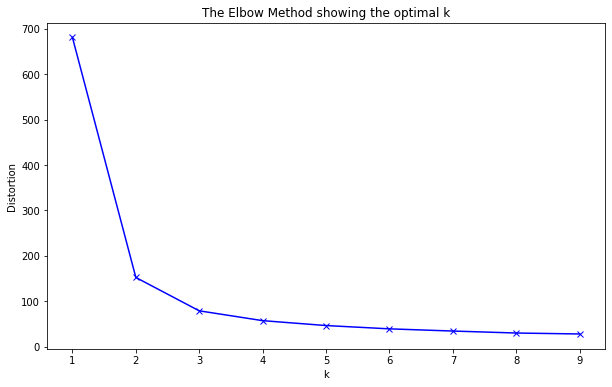

In [33]:
plt.figure(figsize=(10,6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### We can observe that the “elbow” is the number 3 which is optimal for this case. Now we can run a K-Means using as n_clusters the number 3.
#### To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for the data is 3.

In [34]:
kmeans=KMean(data,clusters,10000)

classes,centroids=kmeans.predict()


for i in range(0,3):
    classes[i]=np.array(classes[i]).tolist()
    
for i in range(0,3):
    print(len(classes[i]))
print("Centroids ---", centroids)
print("Classess ---", classes)

39
61
50
Centroids --- defaultdict(<class 'int'>, {0: array([6.85384615, 3.07692308, 5.71538462, 2.05384615]), 1: array([5.88360656, 2.74098361, 4.38852459, 1.43442623]), 2: array([5.006, 3.418, 1.464, 0.244])})
Classess --- defaultdict(<class 'list'>, {0: [[7.0, 3.2, 4.7, 1.4], [6.9, 3.1, 4.9, 1.5], [6.7, 3.0, 5.0, 1.7], [6.3, 3.3, 6.0, 2.5], [7.1, 3.0, 5.9, 2.1], [6.3, 2.9, 5.6, 1.8], [6.5, 3.0, 5.8, 2.2], [7.6, 3.0, 6.6, 2.1], [7.3, 2.9, 6.3, 1.8], [6.7, 2.5, 5.8, 1.8], [7.2, 3.6, 6.1, 2.5], [6.5, 3.2, 5.1, 2.0], [6.4, 2.7, 5.3, 1.9], [6.8, 3.0, 5.5, 2.1], [6.4, 3.2, 5.3, 2.3], [6.5, 3.0, 5.5, 1.8], [7.7, 3.8, 6.7, 2.2], [7.7, 2.6, 6.9, 2.3], [6.9, 3.2, 5.7, 2.3], [7.7, 2.8, 6.7, 2.0], [6.7, 3.3, 5.7, 2.1], [7.2, 3.2, 6.0, 1.8], [6.4, 2.8, 5.6, 2.1], [7.2, 3.0, 5.8, 1.6], [7.4, 2.8, 6.1, 1.9], [7.9, 3.8, 6.4, 2.0], [6.4, 2.8, 5.6, 2.2], [6.1, 2.6, 5.6, 1.4], [7.7, 3.0, 6.1, 2.3], [6.3, 3.4, 5.6, 2.4], [6.4, 3.1, 5.5, 1.8], [6.9, 3.1, 5.4, 2.1], [6.7, 3.1, 5.6, 2.4], [6.9, 3.1, 5.1, 

In [35]:
class0=[]
class1=[]
class2=[]
d = data[:, :4]

for i in range(len(iris.Classes)):
    if iris.Classes[i]=='Iris-setosa':
        class0.append(d[i])
    elif iris.Classes[i]=='Iris-versicolor':
        class1.append(d[i])
    elif iris.Classes[i]=='Iris-virginica':
        class2.append(d[i])


class0=np.array(class0).tolist()
class1=np.array(class1).tolist()
class2=np.array(class2).tolist()


# utility function

def subset(array1,array2):
    flg=0
    for i in range(len(array1)):
        if(array2==array1[i]):
            flg=1
            break
    if(flg==1):
        return True
    else:
        return False
    

# confusion matrix
    
def confusion_matrix(a,b,c,classes):
    
    cm=[[0 for i in range(y.nunique())] for i in range(y.nunique())]

    for element in a:

        if subset(classes[2],element):
            cm[0][0]=cm[0][0]+1
        elif subset(classes[1],element):
            cm[0][1]=cm[0][1]+1
        elif subset(classes[0],element):
            cm[0][2]=cm[0][2]+1

    for element in b:

        if subset(classes[2],element):
            cm[1][0]=cm[1][0]+1
        elif subset(classes[1],element):
            cm[1][1]=cm[1][1]+1
        elif subset(classes[0],element):
            cm[1][2]=cm[1][2]+1

    for element in c:

        if subset(classes[2],element):

            cm[2][0]=cm[2][0]+1
        elif subset(classes[1],element):

            cm[2][1]=cm[2][1]+1
        elif subset(classes[0],element):

            cm[2][2]=cm[2][2]+1
            
    return cm


# performance metrics
            
class Metrics:
    
    def __init__(self,confusion_m):
        self.confusion_m=confusion_m
        self.total=np.sum(confusion_m)
        self.diagonal=np.sum(np.diag(confusion_m))
    
    def accuracy(self):
        accuracy=(self.diagonal/self.total)
        return accuracy
    
    def recall(self):
        recall=np.diag(self.confusion_m)/np.sum(self.confusion_m,axis=1)
        recall=np.mean(recall)
        return recall
    
    def precision(self):
        precision=np.diag(self.confusion_m)/np.sum(self.confusion_m,axis=0)
        precision=np.mean(precision)
        return precision
    
    def f1_score(self,precision,recall):
        f1_score=(2*precision*recall)/(precision+recall)
        
        return f1_score

In [36]:
matrix=confusion_matrix(class0,class1,class2,classes)
performance=Metrics(matrix)

accuracy=performance.accuracy()
recall=performance.recall()
precision=performance.precision()
f1_score=performance.f1_score(precision,recall)

print('confusion matrix is:',end='\n')
print(np.array(matrix),end='\n')

print("Accuracy of the model is {}".format(accuracy*100))
print("Recall of the model is {}".format(recall*100))
print("Precision of the model is {}".format(precision*100))
print("F1-Score of the model is {}".format(f1_score*100))

confusion matrix is:
[[50  0  0]
 [ 0 47  3]
 [ 0 14 36]]
Accuracy of the model is 88.66666666666667
Recall of the model is 88.66666666666667
Precision of the model is 89.78562421185372
F1-Score of the model is 89.22263731397425


## Gaussian Mixture Models Implementation
### Using K-means clusters below to calculate GMM parameters 

In [37]:
def initialize_clusters(X, n_clusters):
    clusters = []
    # We use the KMeans centroids to initialise the GMM
    mu_k = centroids
    
    for i in range(len(n_clusters)):
        b = np.array(n_clusters[i])
        clusters.append({
            'pi_k': 1.0 / len(n_clusters), # mixing coefficients
            'mu_k': mu_k[i],
            'cov_k': np.identity(X.shape[1], dtype=np.float64)
        })
        
    return clusters

In [38]:
clusters1 = initialize_clusters(data, classes)
clusters1

[{'pi_k': 0.3333333333333333,
  'mu_k': array([6.85384615, 3.07692308, 5.71538462, 2.05384615]),
  'cov_k': array([[1., 0., 0., 0.],
         [0., 1., 0., 0.],
         [0., 0., 1., 0.],
         [0., 0., 0., 1.]])},
 {'pi_k': 0.3333333333333333,
  'mu_k': array([5.88360656, 2.74098361, 4.38852459, 1.43442623]),
  'cov_k': array([[1., 0., 0., 0.],
         [0., 1., 0., 0.],
         [0., 0., 1., 0.],
         [0., 0., 0., 1.]])},
 {'pi_k': 0.3333333333333333,
  'mu_k': array([5.006, 3.418, 1.464, 0.244]),
  'cov_k': array([[1., 0., 0., 0.],
         [0., 1., 0., 0.],
         [0., 0., 1., 0.],
         [0., 0., 0., 1.]])}]

In [14]:
def gaussian(X, mu, cov):
    n = X.shape[1]
    diff = (X - mu).T
    return np.diagonal(1 / ((2 * np.pi) ** (n / 2) * np.linalg.det(cov) ** 0.5) * np.exp(-0.5 * np.dot(np.dot(diff.T, np.linalg.inv(cov)), diff))).reshape(-1, 1)

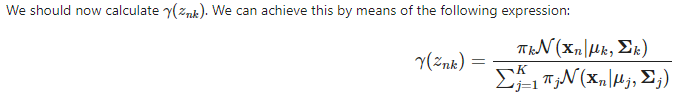

In [15]:
def expectation_step(X, clusters):
    global gamma_nk, totals
    N = X.shape[0]
    K = len(clusters)
    totals = np.zeros((N, 1), dtype=np.float64)
    gamma_nk = np.zeros((N, K), dtype=np.float64)
    
    for k, cluster in enumerate(clusters):
        pi_k = cluster['pi_k']
        mu_k = cluster['mu_k']
        cov_k = cluster['cov_k']
        gamma_nk[:, k] = (pi_k * gaussian(X, mu_k, cov_k)).ravel()
    
    totals = np.sum(gamma_nk, 1)
    gamma_nk /= np.expand_dims(totals, 1)

In [16]:
expectation_step(data, clusters1)

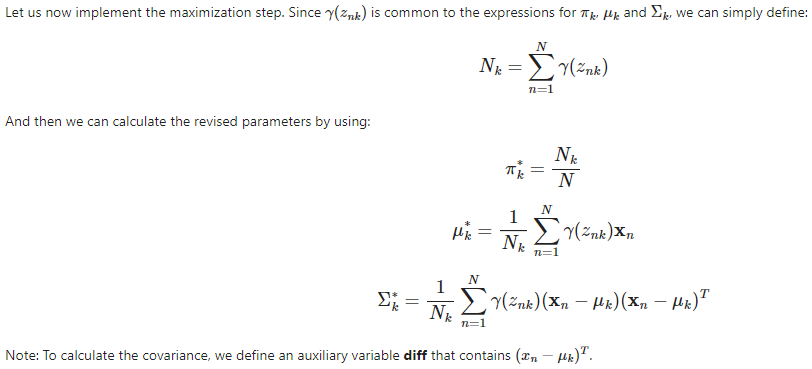

In [17]:
def maximization_step(X, clusters):
    global gamma_nk
    N = float(X.shape[0])
  
    for k, cluster in enumerate(clusters):
        gamma_k = np.expand_dims(gamma_nk[:, k], 1)
        N_k = np.sum(gamma_k, axis=0)
        
        pi_k = N_k / N # mixing coefficients
        mu_k = np.sum(gamma_k * X, axis=0) / N_k
        cov_k = (gamma_k * (X - mu_k)).T @ (X - mu_k) / N_k
        
        cluster['pi_k'] = pi_k
        cluster['mu_k'] = mu_k
        cluster['cov_k'] = cov_k

In [18]:
maximization_step(data, clusters1)

### Let us now determine the log-likelihood of the model. It is given by:

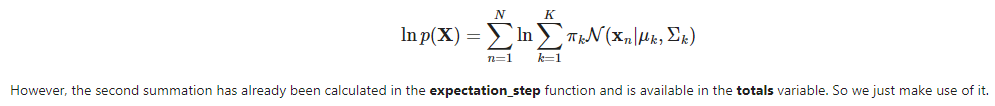

In [19]:
def get_likelihood(X, clusters):
    global gamma_nk, totals
    sample_likelihoods = np.log(totals)
    return np.sum(sample_likelihoods), sample_likelihoods

#### Let's finally put it all together! First, we'll use the initialize clusters function to set the parameters, and then we'll proceed through multiple expectation-maximization processes. The number of iterations of the training procedure is set to a fixed n epochs number in this example. This was done on purpose in order to construct log-likelihood graphs afterwards.

In [20]:
def train_gmm(X, n_clusters, n_epochs):
    clusters = initialize_clusters(X, n_clusters)
    likelihoods = np.zeros((n_epochs, ))
    scores = np.zeros((X.shape[0], len(n_clusters)))
    history = []

    for i in range(n_epochs):
        clusters_snapshot = []
        
        # This is just for our later use in the graphs
        for cluster in clusters:
            clusters_snapshot.append({
                'mu_k': cluster['mu_k'].copy(),
                'cov_k': cluster['cov_k'].copy()
            })
            
        history.append(clusters_snapshot)
      
        expectation_step(X, clusters)
        maximization_step(X, clusters)

        likelihood, sample_likelihoods = get_likelihood(X, clusters)
        likelihoods[i] = likelihood

        print('Epoch: ', i + 1, 'Likelihood: ', likelihood)

    scores = np.log(gamma_nk)
    
    return clusters, likelihoods, scores, sample_likelihoods, history

In [21]:

n_epochs = 50

clusters, likelihoods, scores, sample_likelihoods, history = train_gmm(data, classes, n_epochs)

Epoch:  1 Likelihood:  -727.551466500141
Epoch:  2 Likelihood:  -230.69383039318066
Epoch:  3 Likelihood:  -200.78087276818044
Epoch:  4 Likelihood:  -196.80324436537433
Epoch:  5 Likelihood:  -193.37499833467444
Epoch:  6 Likelihood:  -190.83877724293393
Epoch:  7 Likelihood:  -189.11795324535316
Epoch:  8 Likelihood:  -187.84102492885555
Epoch:  9 Likelihood:  -186.67897129278023
Epoch:  10 Likelihood:  -185.61895708035803
Epoch:  11 Likelihood:  -184.68659643728395
Epoch:  12 Likelihood:  -183.85904193080742
Epoch:  13 Likelihood:  -183.17270240024982
Epoch:  14 Likelihood:  -182.61075012718945
Epoch:  15 Likelihood:  -182.02307887276982
Epoch:  16 Likelihood:  -181.43370093451108
Epoch:  17 Likelihood:  -181.1346409115097
Epoch:  18 Likelihood:  -181.03955795017336
Epoch:  19 Likelihood:  -181.0102657680005
Epoch:  20 Likelihood:  -181.00114495234044
Epoch:  21 Likelihood:  -180.99828364277295
Epoch:  22 Likelihood:  -180.9973797236113
Epoch:  23 Likelihood:  -180.9970927147872
Epo

In [22]:
# mu_k represents mean
# covariance is mu_k
clusters

[{'pi_k': array([0.36747348]),
  'mu_k': array([6.54454865, 2.94866115, 5.47955343, 1.98460495]),
  'cov_k': array([[0.38704429, 0.09220792, 0.30281173, 0.06165105],
         [0.09220792, 0.1103377 , 0.08428758, 0.0560115 ],
         [0.30281173, 0.08428758, 0.32779736, 0.07453004],
         [0.06165105, 0.0560115 , 0.07453004, 0.08579773]])},
 {'pi_k': array([0.29919319]),
  'mu_k': array([5.91496959, 2.77784365, 4.20155323, 1.29696685]),
  'cov_k': array([[0.27531878, 0.09694138, 0.18466239, 0.05439074],
         [0.09694138, 0.09264604, 0.09114317, 0.04299735],
         [0.18466239, 0.09114317, 0.20063041, 0.06097847],
         [0.05439074, 0.04299735, 0.06097847, 0.03199695]])},
 {'pi_k': array([0.33333333]),
  'mu_k': array([5.006, 3.418, 1.464, 0.244]),
  'cov_k': array([[0.121764, 0.098292, 0.015816, 0.010336],
         [0.098292, 0.142276, 0.011448, 0.011208],
         [0.015816, 0.011448, 0.029504, 0.005584],
         [0.010336, 0.011208, 0.005584, 0.011264]])}]

In [23]:
print("mixing coefficient: ")
for i in range(len(clusters)):
    print(np.round(clusters[i]['pi_k'],4))

mixing coefficient: 
[0.3675]
[0.2992]
[0.3333]


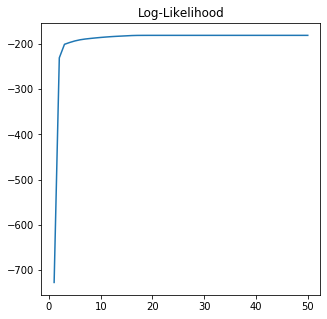

In [24]:
plt.figure(figsize=(5, 5))
plt.title('Log-Likelihood')
plt.plot(np.arange(1, n_epochs + 1), likelihoods)
plt.show()